In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [2]:
# loading data
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# concatenaing data alltogether in a single dataframe
df = pd.concat([df1, df2, df3, df4, df5], axis = 0)

# top 5 rows
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
# bottom 5 rows
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
173548,2024-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,01 TO 03,154.0,Maisonette,1988,850000.0,63 years 10 months
173549,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
173550,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months
173551,2024-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,908000.0,62 years 11 months
173552,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


## Dataset Analysis

In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
#Basic statistical analysis of dataset
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,919756.000000,919756.000000,9.197560e+05
mean,95.695607,1988.196860,3.185345e+05
std,25.839642,10.580874,1.685153e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.920000e+05
50%,93.000000,1986.000000,2.950000e+05
75%,113.000000,1996.000000,4.150000e+05
max,307.000000,2022.000000,1.568888e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919756 entries, 0 to 173552
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                919756 non-null  object 
 1   town                 919756 non-null  object 
 2   flat_type            919756 non-null  object 
 3   block                919756 non-null  object 
 4   street_name          919756 non-null  object 
 5   storey_range         919756 non-null  object 
 6   floor_area_sqm       919756 non-null  float64
 7   flat_model           919756 non-null  object 
 8   lease_commence_date  919756 non-null  int64  
 9   resale_price         919756 non-null  float64
 10  remaining_lease      210706 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.2+ MB


In [9]:
# Checking Target value
df['resale_price'].value_counts()

resale_price
300000.0    6902
350000.0    6801
280000.0    6542
320000.0    6502
250000.0    6282
            ... 
143450.0       1
269001.0       1
400998.0       1
299750.0       1
545555.0       1
Name: count, Length: 9412, dtype: int64

### Data Pre-Processing

In [11]:
# Null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
# Lets drop remaining lease as it alone has too many nulls 
df.drop('remaining_lease', axis = 1, inplace = True)

In [14]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [15]:
# Checking for duplicates
df[df.duplicated()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
673,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000.0
726,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000.0
843,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400.0
854,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900.0
862,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500.0
...,...,...,...,...,...,...,...,...,...,...
168419,2023-12,QUEENSTOWN,4 ROOM,29,GHIM MOH LINK,31 TO 33,93.0,Model A,2018,1000000.0
169673,2024-01,BUKIT PANJANG,4 ROOM,447,BT PANJANG RING RD,04 TO 06,101.0,Model A,1997,482000.0
170831,2024-01,SEMBAWANG,4 ROOM,365B,SEMBAWANG CRES,04 TO 06,93.0,Model A,2019,565000.0
171679,2024-01,YISHUN,4 ROOM,462C,YISHUN AVE 6,01 TO 03,93.0,Model A,2019,530000.0


In [16]:
#Lets remove the duplicated rows:
df.duplicated().sum()

1964

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [21]:
df.shape
# The dataset has 917792 rows and 10 columns

(917792, 10)

In [22]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [23]:
#The month column mentions the time at which the flat was resold, but its both year and month so we'll split it into 2 different columns
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,01
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,01
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,01
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,01


#### Storey Range Column
New features can be introduced by splitting the storey range column into the min and max limits mentioned in the column for better model training

In [24]:
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

In [26]:
#Convert these ranges into Numeric values for model feeding
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,01,4,6
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,01,10,12
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,01,7,9
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,01,4,6


In [27]:
df.drop('storey_range', axis = 1, inplace= True)

#### Converting existing Numerical columns into Regression variables

In [31]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,1990,1,4,6


In [32]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

### Rectifying Text Errors

In [33]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [34]:

df['town'].value_counts()

town
TAMPINES           79299
YISHUN             69426
BEDOK              66118
JURONG WEST        65987
WOODLANDS          64854
ANG MO KIO         51665
HOUGANG            50260
BUKIT BATOK        43877
CHOA CHU KANG      37911
BUKIT MERAH        33994
PASIR RIS          32984
SENGKANG           31893
TOA PAYOH          31241
QUEENSTOWN         28522
GEYLANG            27953
CLEMENTI           27821
BUKIT PANJANG      27417
KALLANG/WHAMPOA    26880
JURONG EAST        24573
SERANGOON          22676
BISHAN             21141
PUNGGOL            20079
SEMBAWANG          13590
MARINE PARADE       7981
CENTRAL AREA        7084
BUKIT TIMAH         2503
LIM CHU KANG          63
Name: count, dtype: int64

In [35]:
df['flat_type'].value_counts()

flat_type
4 ROOM              348574
3 ROOM              293192
5 ROOM              193489
EXECUTIVE            69151
2 ROOM               11577
1 ROOM                1269
MULTI GENERATION       279
MULTI-GENERATION       261
Name: count, dtype: int64

In [36]:
#Merging the last 2 value types since theyre seperated by text error
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [37]:
df['flat_type'].value_counts()


flat_type
4 ROOM              348574
3 ROOM              293192
5 ROOM              193489
EXECUTIVE            69151
2 ROOM               11577
1 ROOM                1269
MULTI GENERATION       540
Name: count, dtype: int64

In [38]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17483
BEDOK RESERVOIR RD    14625
ANG MO KIO AVE 10     13715
ANG MO KIO AVE 3      12061
HOUGANG AVE 8          9299
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [39]:

df['flat_model'].value_counts()

flat_model
Model A                   191478
Improved                  166146
New Generation            109004
NEW GENERATION             78646
IMPROVED                   73296
MODEL A                    70234
Premium Apartment          45949
Simplified                 33962
Apartment                  25331
Standard                   24950
SIMPLIFIED                 23211
STANDARD                   17323
Maisonette                 17270
MAISONETTE                 12195
Model A2                   10041
APARTMENT                   9887
DBSS                        3225
Adjoined flat               1237
Model A-Maisonette          1083
MODEL A-MAISONETTE           981
Terrace                      443
Type S1                      430
MULTI GENERATION             279
Multi Generation             261
TERRACE                      247
Type S2                      214
Premium Apartment Loft       107
2-room                        97
Premium Maisonette            86
Improved-Maisonette           81

In [40]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [41]:

df['flat_model'].value_counts()

flat_model
Model A                   261712
Improved                  239442
New Generation            187650
Simplified                 57173
Premium Apartment          45955
Standard                   42273
Apartment                  35218
Maisonette                 29465
Model A2                   10041
DBSS                        3225
Model A-Maisonette          2064
Adjoined flat               1237
Terrace                      690
Multi Generation             540
Type S1                      430
Type S2                      214
Improved-Maisonette          125
2-room                       118
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          27
Name: count, dtype: int64

#### Dropping Duplicates

In [42]:
df.duplicated().sum()

626

In [43]:

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [44]:
df.to_csv('cleaned_data.csv', index=False)

In [19]:
df = pd.read_csv('cleaned_data.csv')

In [45]:
corr = df.corr(numeric_only=True)
corr

,block,floor_area_sqm,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
block,1.000000,0.187449,0.012369,-0.084598,-0.112939,0.000316,-0.129177,-0.129234
floor_area_sqm,0.187449,1.000000,0.391528,0.567688,0.064158,0.002743,0.043114,0.043289
lease_commence_date,0.012369,0.391528,1.000000,0.535461,0.427472,0.009049,0.169581,0.170008
resale_price,-0.084598,0.567688,0.535461,1.000000,0.669342,0.014224,0.246447,0.248950
resale_year,-0.112939,0.064158,0.427472,0.669342,1.000000,-0.014587,0.107093,0.109100
resale_month,0.000316,0.002743,0.009049,0.014224,-0.014587,1.000000,-0.000868,-0.003201
storey_lower_bound,-0.129177,0.043114,0.169581,0.246447,0.107093,-0.000868,1.000000,0.999362
storey_upper_bound,-0.129234,0.043289,0.170008,0.248950,0.109100,-0.003201,0.999362,1.000000


<Axes: >

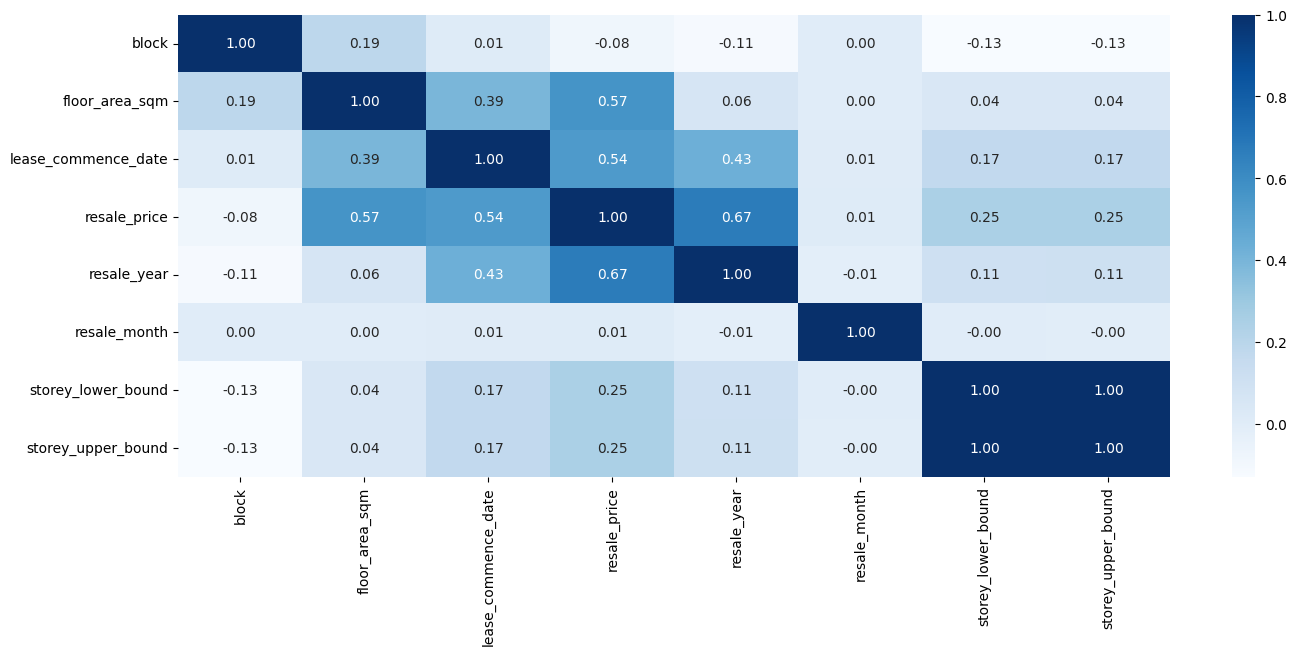

In [46]:
plt.figure(figsize = (16,6))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Blues")

### Outliers -  BoxPlot

In [47]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price']

In [48]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

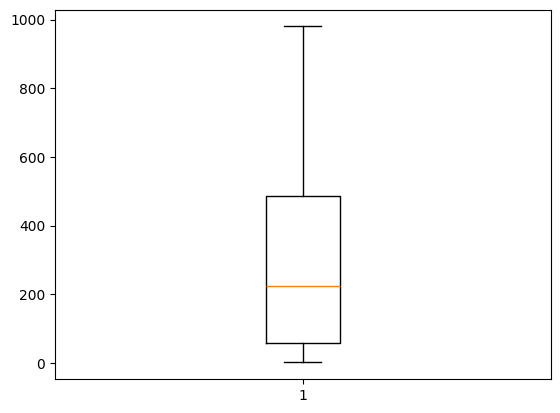

In [49]:
#Boxplot for block
plt.boxplot(df['block'] )


plt.show()

In [50]:
Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-582.5, 1125.5)

In [51]:

df.block = df.block.clip(lower_bound , upper_bound)

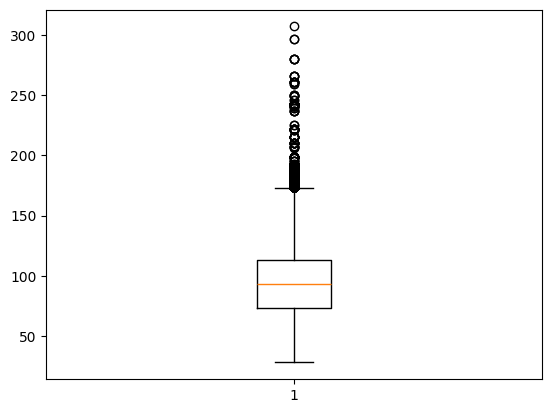

In [52]:
#Boxplot for Floor Area
plt.boxplot(df['floor_area_sqm'] )

plt.show()

In [53]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [54]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)


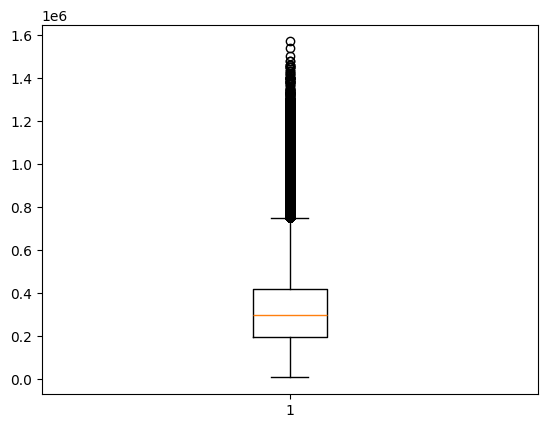

In [55]:

#Boxplot for Resale Price
plt.boxplot(df['resale_price'] )


plt.show()

In [56]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-142500.0, 749500.0)

In [57]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

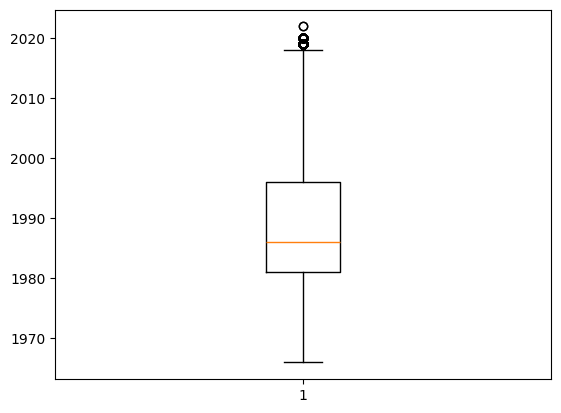

In [59]:
#Boxplot for Commence date
plt.boxplot(df['lease_commence_date'] )


plt.show()

In [60]:

Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [61]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

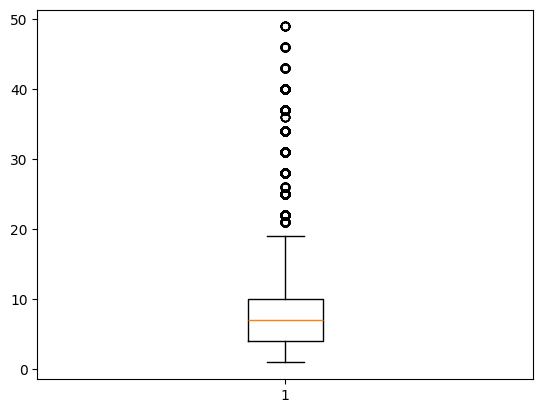

In [62]:
# Boxplot for Lower storey
plt.boxplot(df['storey_lower_bound'] )


plt.show()

In [63]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [64]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

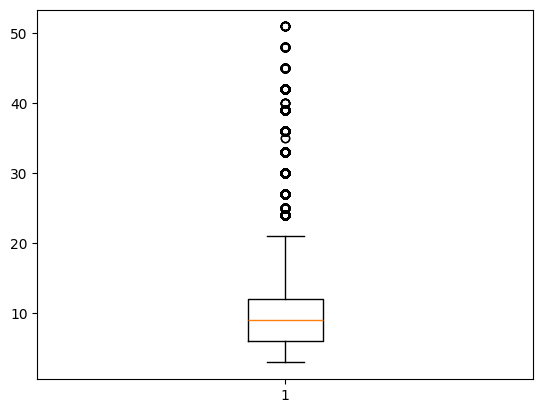

In [65]:
#Boxplot for Upper Storey
plt.boxplot(df['storey_upper_bound'] )


plt.show()

In [66]:

Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [67]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)


## Exploratory Data Analysis

#### Categorical variables on how frequent they appear

In [68]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

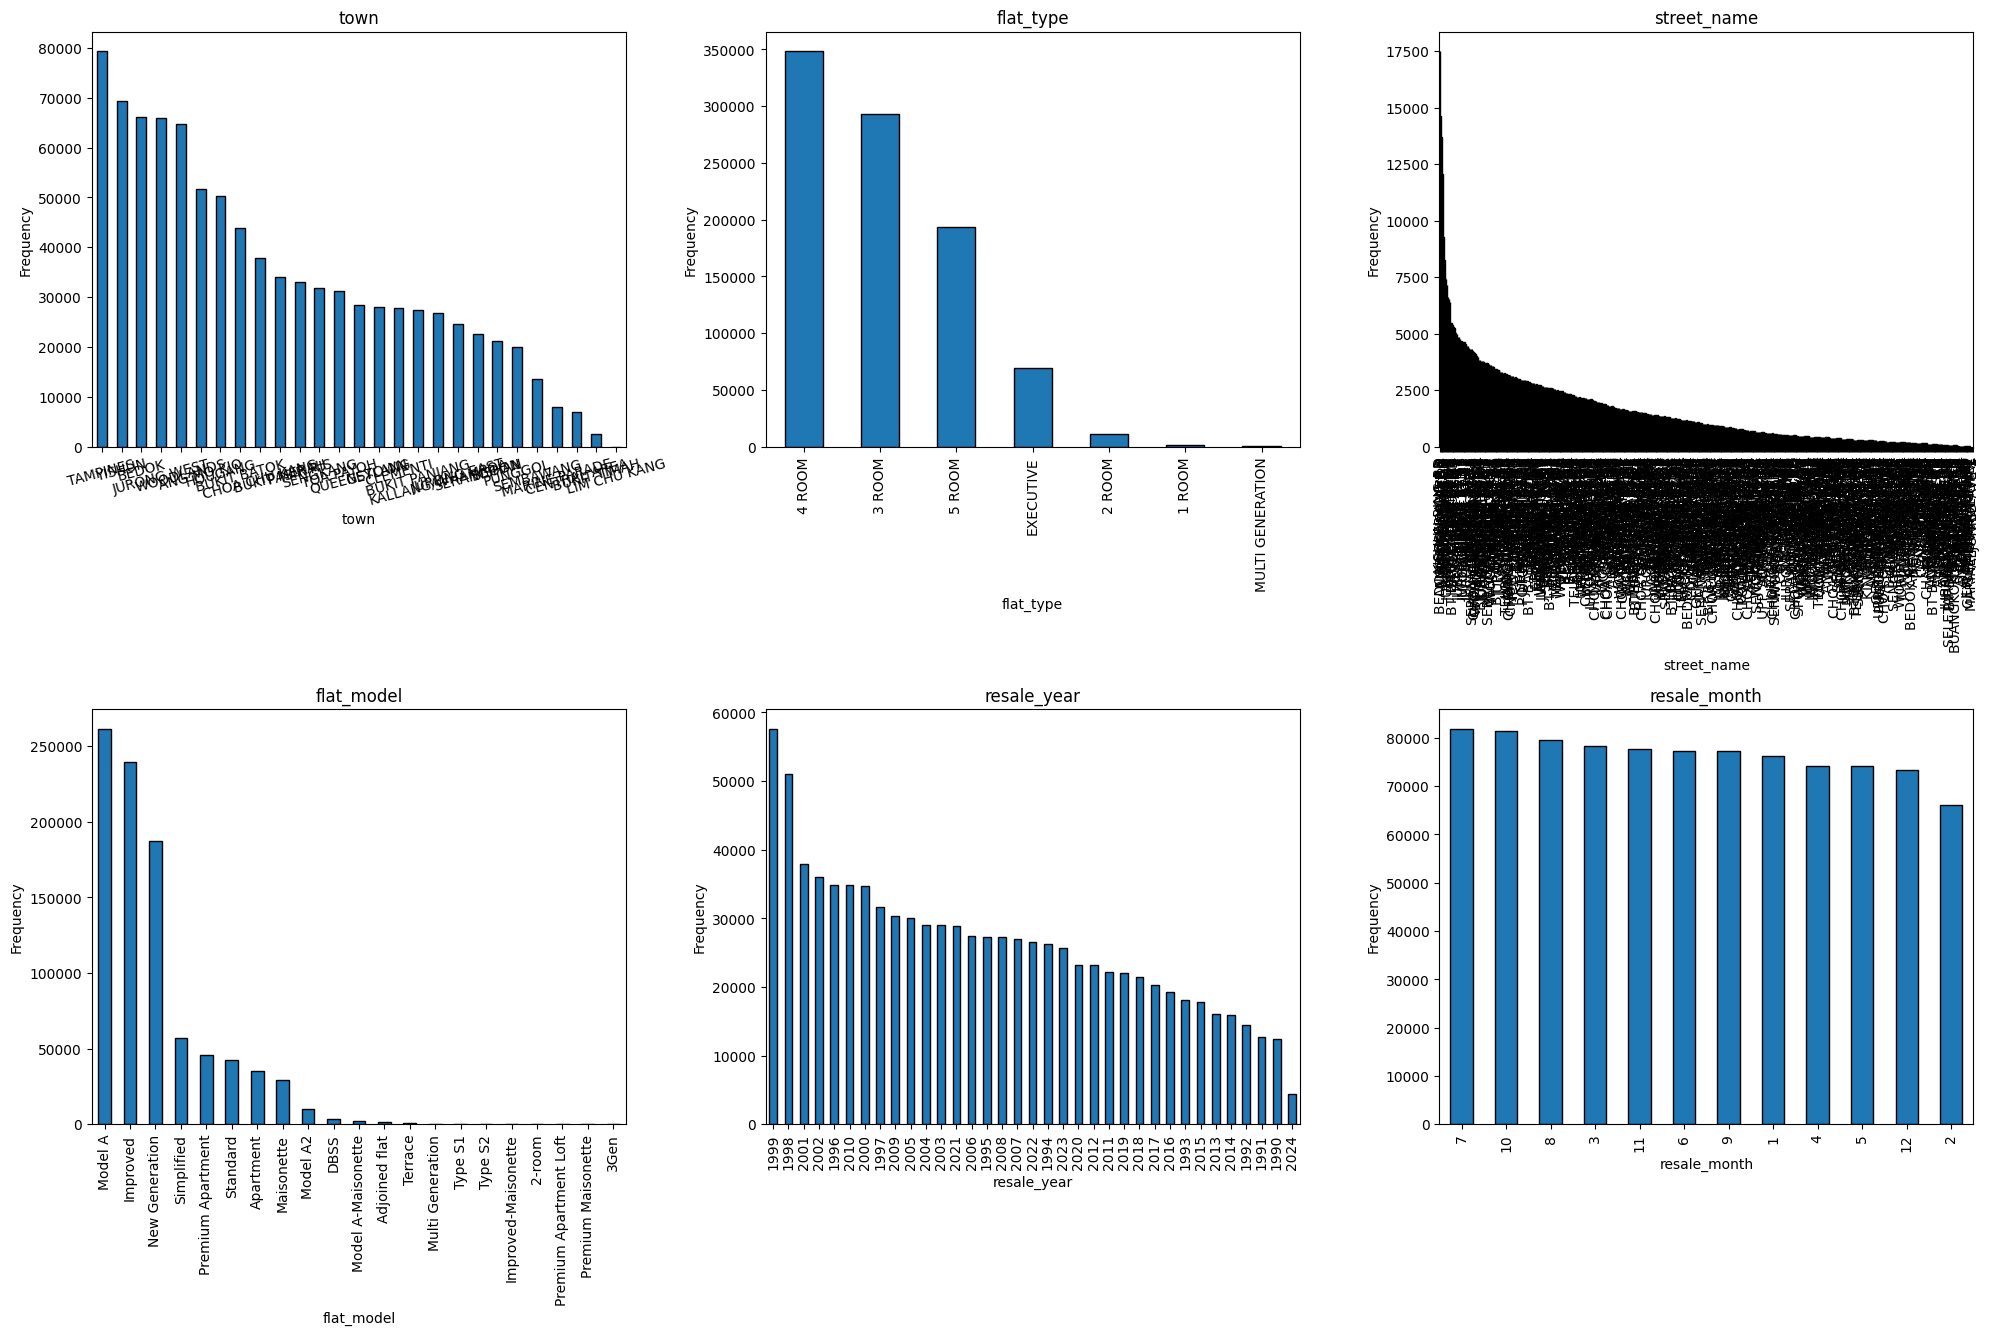

In [69]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Categorical Features vs Target Variable

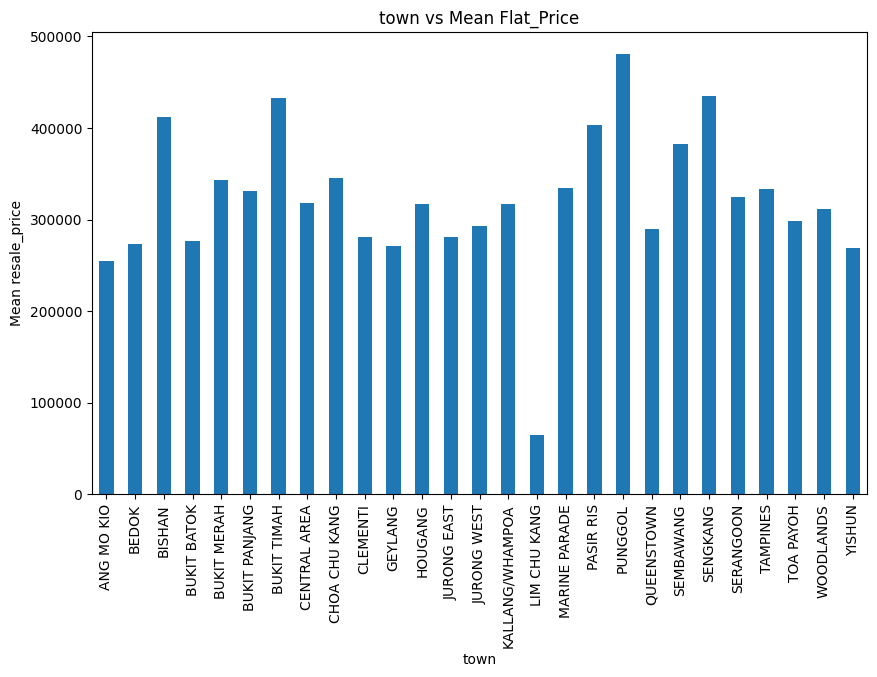

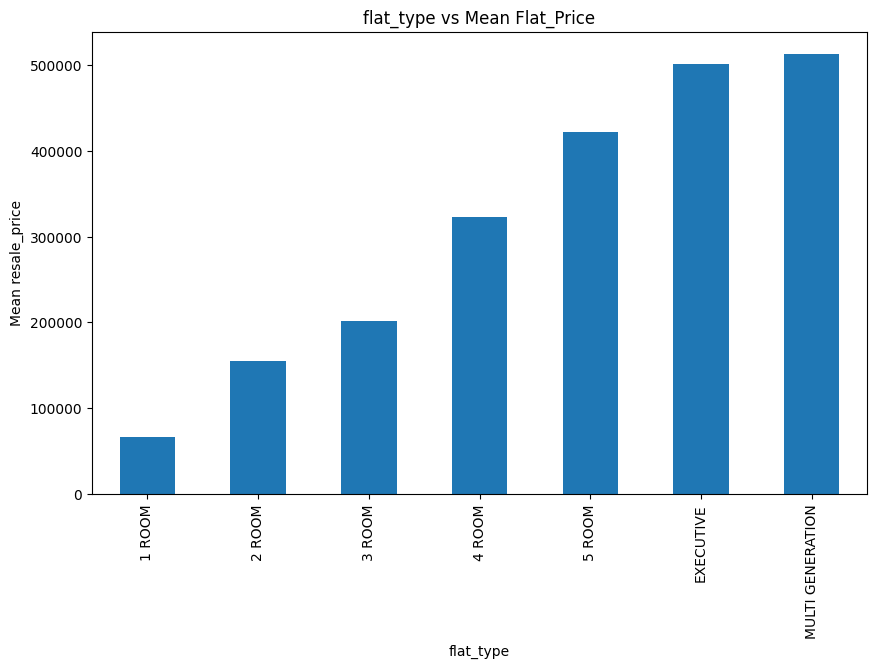

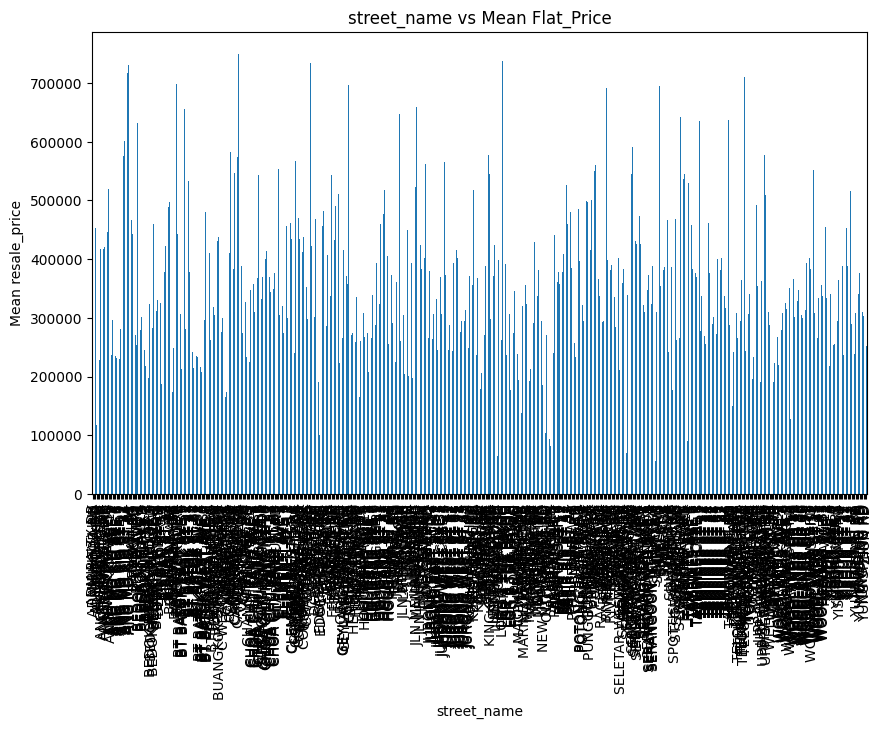

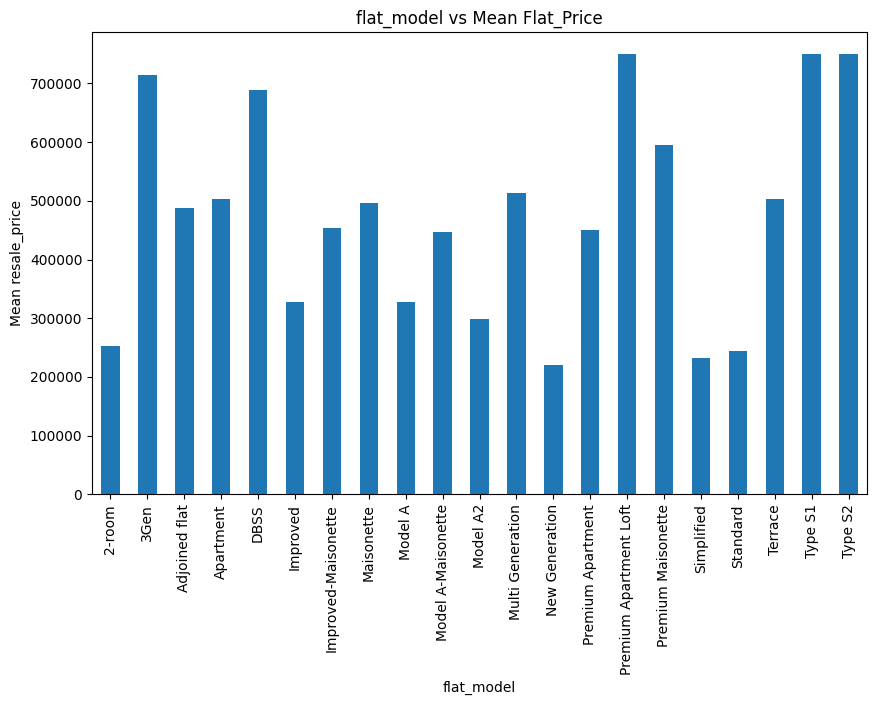

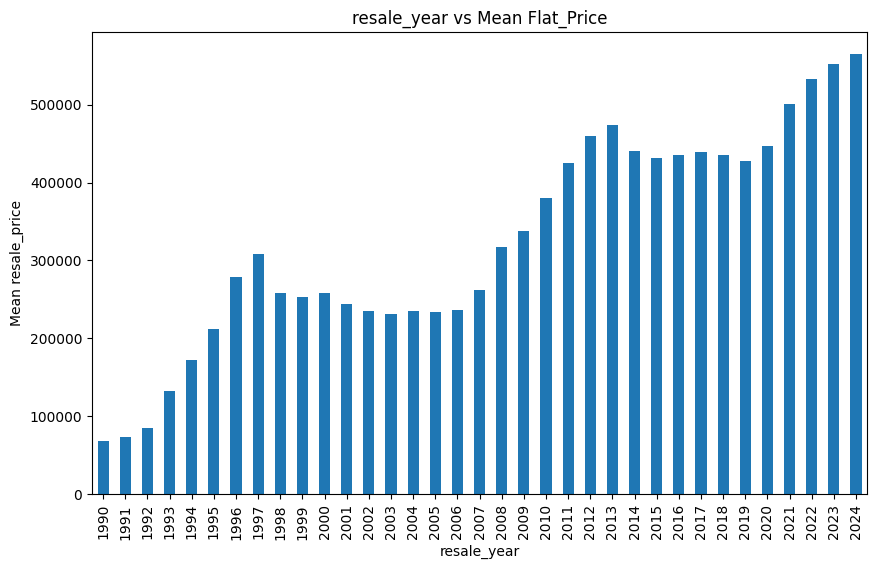

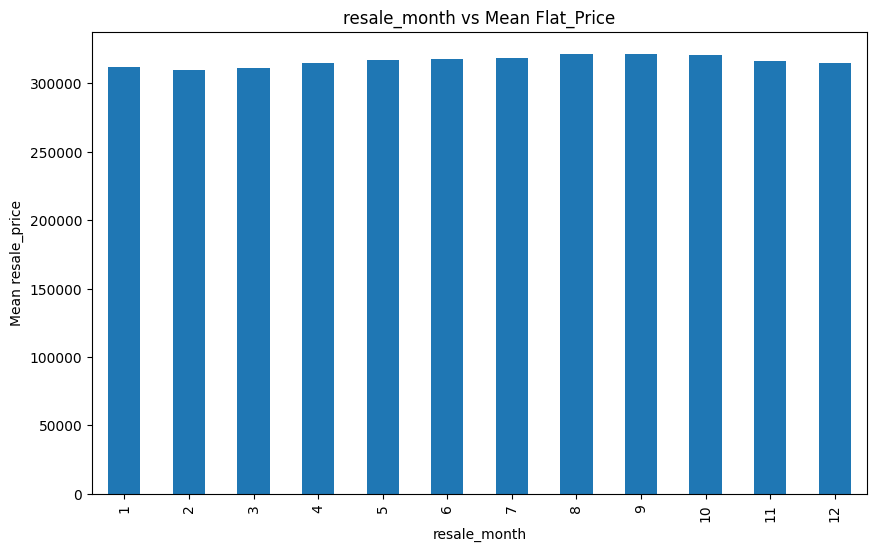

In [71]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flat_Price')
    plt.show()

#### Comparing Target Variable with Continuous Variable

In [72]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'lease_commence_date', 'resale_price']

In [73]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

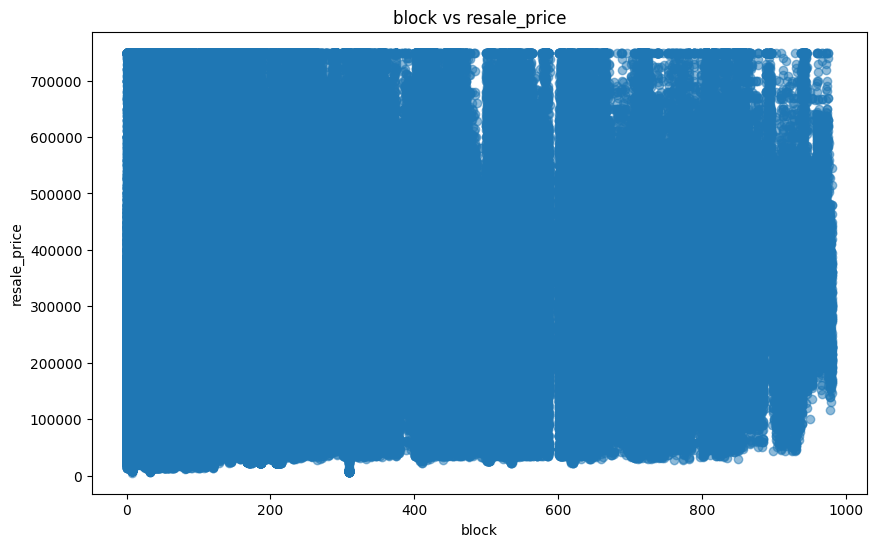

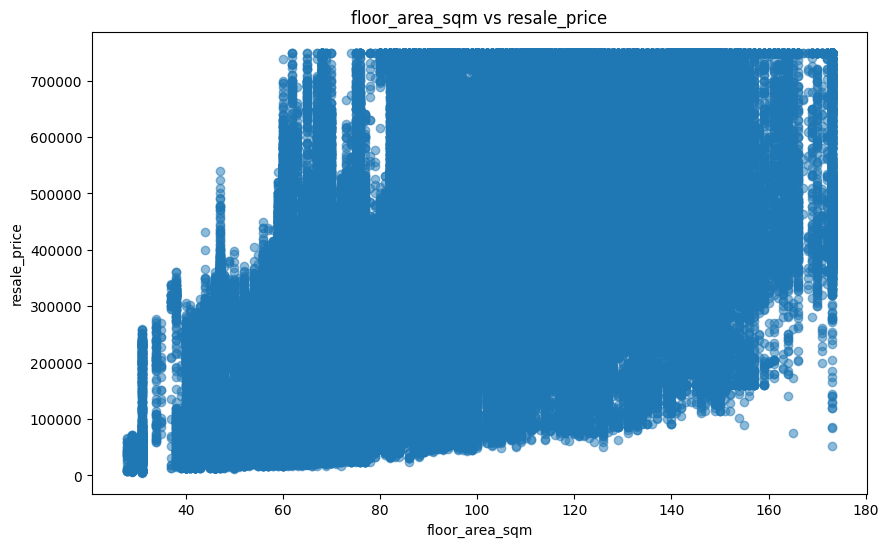

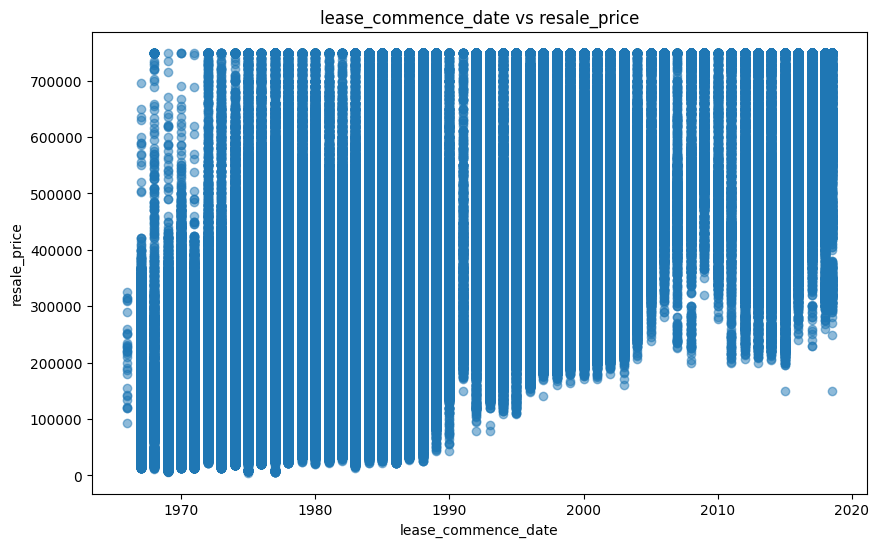

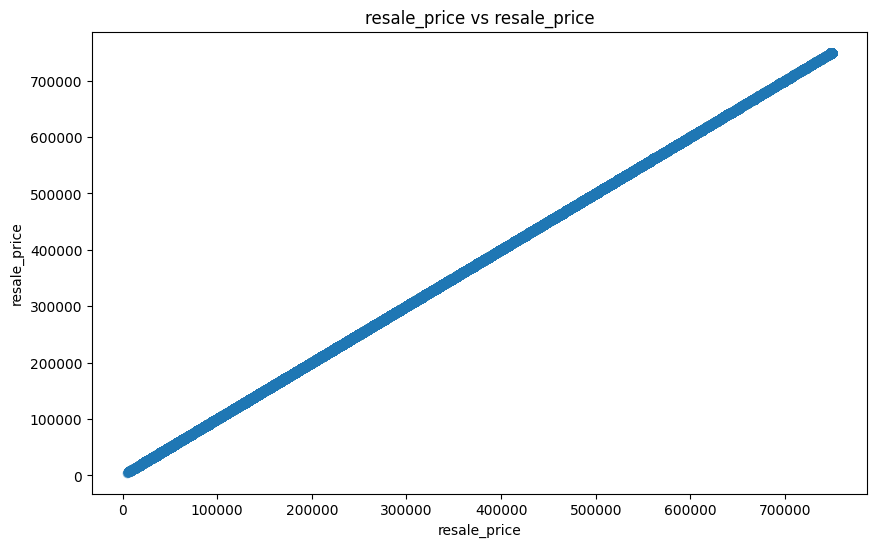

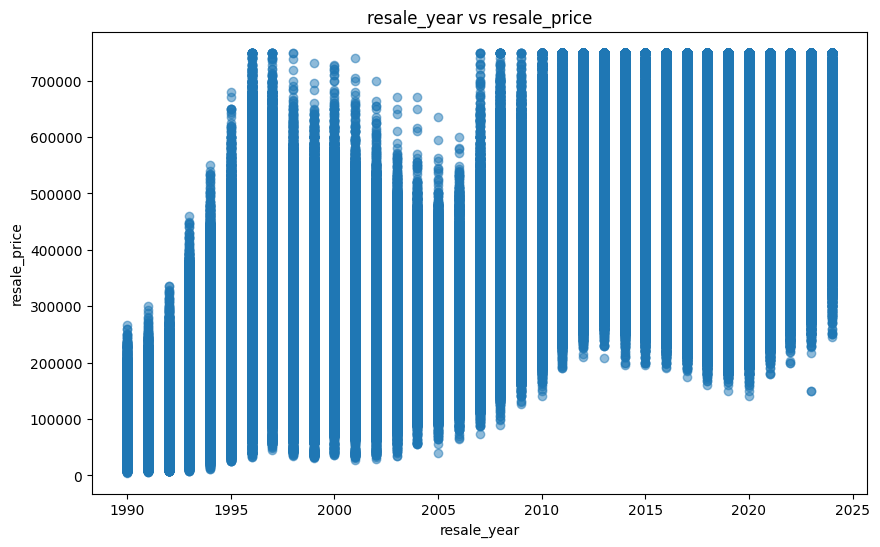

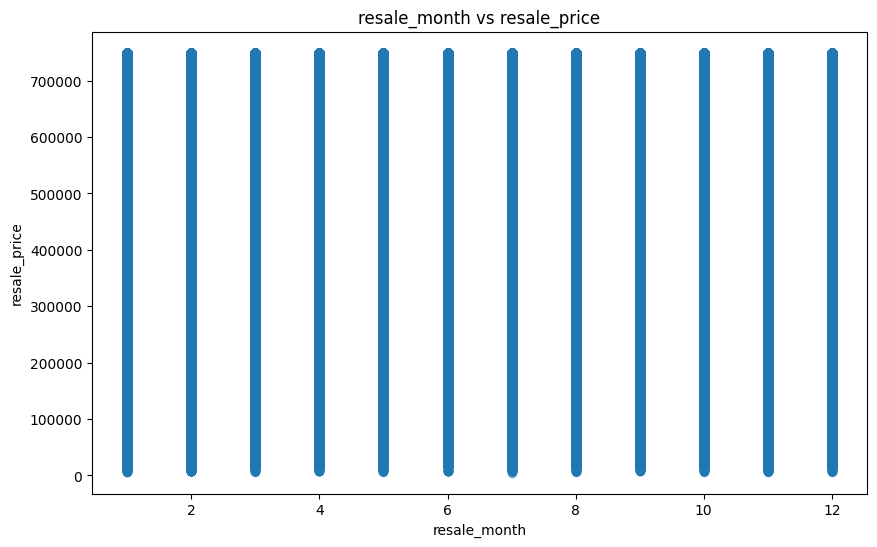

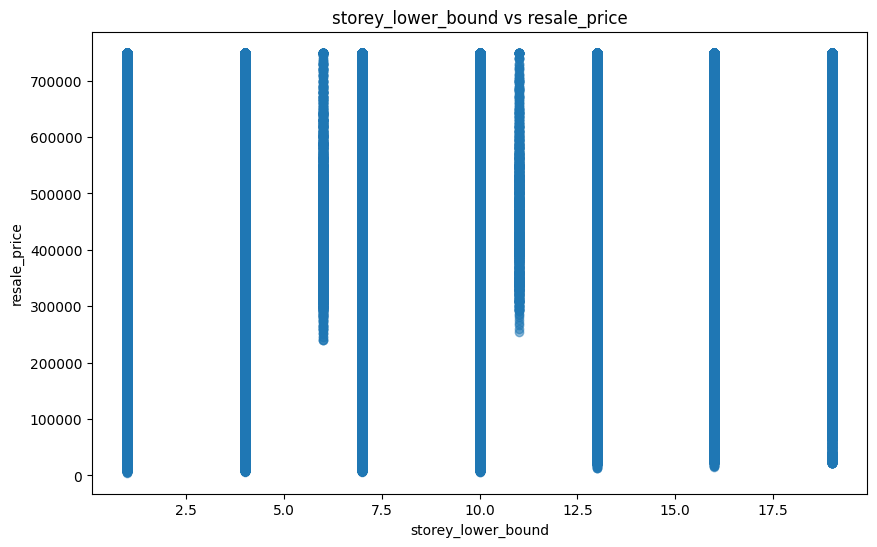

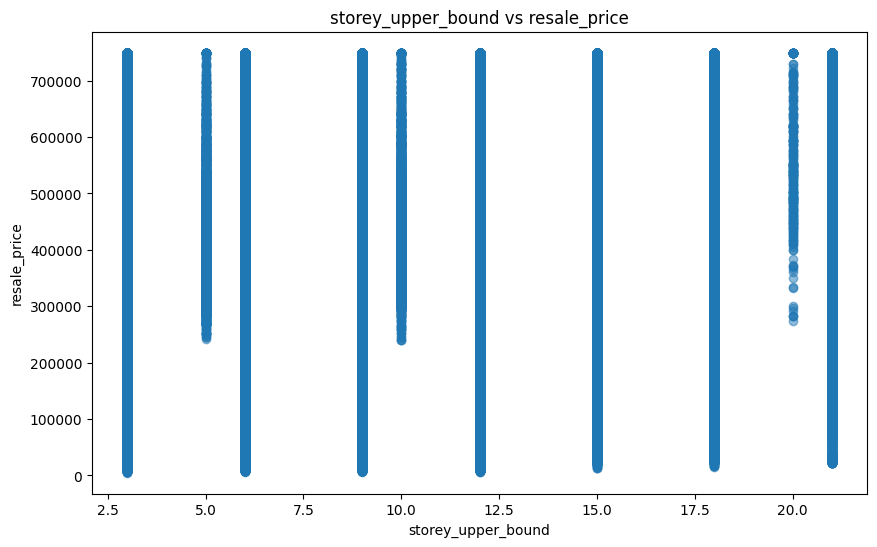

In [75]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'resale_year',
 'resale_month',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

## Encoding Categorical Columns

In [92]:
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [93]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

In [94]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [95]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,8000.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,1,73.0,New Generation,1976.0,47200.0,1990,1,4,6


In [96]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [97]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,8000.0,1990,1,10,12
3,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,1990,1,7,9
4,ANG MO KIO,3,216.0,1,73.0,New Generation,1976.0,47200.0,1990,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
173548,YISHUN,6,355.0,219,154.0,Maisonette,1988.0,749500.0,2024,2,1,3
173549,YISHUN,6,606.0,288,142.0,Apartment,1987.0,749500.0,2024,2,10,12
173550,YISHUN,6,824.0,305,146.0,Maisonette,1987.0,749500.0,2024,2,7,9
173551,YISHUN,6,826.0,305,146.0,Maisonette,1988.0,749500.0,2024,2,4,6


In [98]:
df1['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [99]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,1990,1,10,12
3,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,7,9
4,ANG MO KIO,3,216.0,1,73.0,15,1976.0,47200.0,1990,1,4,6


In [100]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,7,9
4,1,3,216.0,1,73.0,15,1976.0,47200.0,1990,1,4,6


In [101]:
df1.to_csv('encoded_data.csv', index=False)

In [2]:
df1 = pd.read_csv("encoded_data.csv")
df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,1990,1,7,9
4,1,3,216.0,1,73.0,15,1976.0,47200.0,1990,1,4,6


### Test and Train Splitting

In [3]:
from sklearn.model_selection import train_test_split

X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(733732, 11) (183434, 11) (733732,) (183434,)


### Standard scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.4941673 , -0.01448226, -0.67762558, ..., -1.62894324,
          0.77058376,  0.76742282],
        [-0.08413461, -0.01448226,  0.90325133, ..., -1.33655211,
         -1.25426606, -1.25776629],
        [-0.34050419,  1.0399035 ,  1.07086238, ..., -0.45937874,
          0.09563382,  0.09235978],
        ...,
        [-1.23779772, -0.01448226, -0.48334914, ...,  0.41779463,
         -0.57931612, -0.58270325],
        [ 0.04405018, -0.01448226, -0.72333769, ...,  1.00257687,
         -1.25426606, -1.25776629],
        [ 0.81315892, -1.06886803, -1.0242757 , ..., -0.75176987,
          0.77058376,  0.76742282]]),
 array([[-1.23779772, -0.01448226, -0.1976485 , ...,  0.41779463,
          0.09563382,  0.09235978],
        [ 0.81315892, -1.06886803, -1.01665702, ..., -0.45937874,
         -0.12934949,  0.31738079],
        [-1.23779772, -1.06886803, -0.0528935 , ..., -1.62894324,
         -0.57931612, -0.58270325],
        ...,
        [-0.46868898, -1.06886803, -0.9785636 , ...,  

#### Importing models

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression

In [11]:
linear_model = LinearRegression(fit_intercept=True) 
linear_model.fit(X_train,y_train) 
print(linear_model.predict(X_test))     
print(y_test)

[321648.04572512 323797.42775041 196886.13591715 ... 348526.01960629
 462989.55773414 373887.6896882 ]
441512    226500.0
661717    335000.0
395509    104000.0
775198    365000.0
150963    350000.0
            ...   
391346    430000.0
88837      96600.0
827479    233000.0
660029    468888.0
449235    290000.0
Name: resale_price, Length: 183434, dtype: float64


In [12]:
linear_model.score(X_test, y_test)

0.7884710616898482

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7895243169804396

### KNN Algorithm

In [14]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28883.670152948747
Mean Squared Error (MSE)     : 1777397128.6603158
Root Mean Square Error (RMSE): 42159.187950674714
R-squared (R2) Score         : 0.9316994867818257


### Decision Tree Regressor

In [15]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17476.58121705587
Mean Squared Error (MSE)     : 668795255.7415435
Root Mean Square Error (RMSE): 25861.076074702374
R-squared (R2) Score         : 0.9743000264440298


rf_regressor = RandomForestRegressor(random_state=42)

### Random Forest Regression

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)

Mean Absolute Error (MAE)    : 13862.028002228979
Mean Squared Error (MSE)     : 400675901.5284351
Root Mean Square Error (RMSE): 20016.890406065453
R-squared (R2) Score         : 0.9846031203340732


### Suggestion

In [17]:
rf_regressor.feature_importances_

array([0.0419228 , 0.05066769, 0.01487059, 0.02337999, 0.28473789,
       0.00764514, 0.03294202, 0.52598919, 0.00660365, 0.00471658,
       0.00652446])

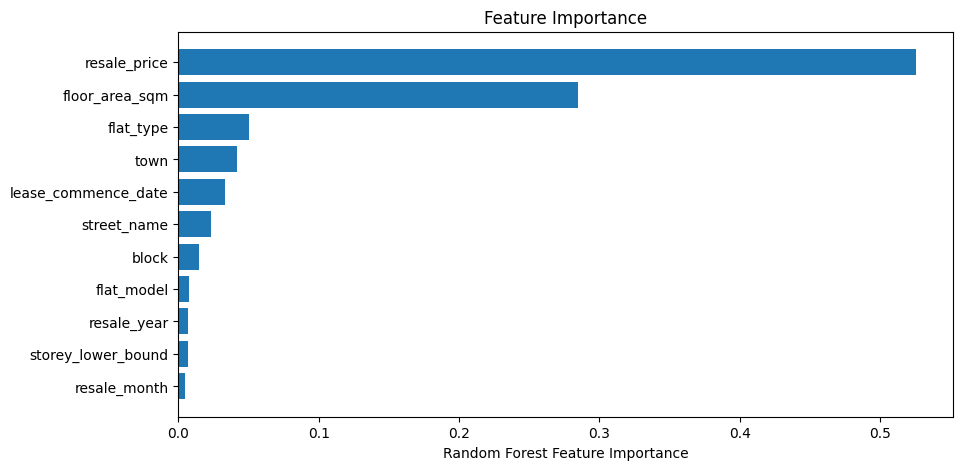

In [20]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

## Sample prediction

In [10]:
# get sample to predict the resale price
pre_df =df1.sample(n=2)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
800072,19,4,246.0,425,105.0,16,1997.0,450000.0,2019,8,7,9
784452,20,3,2.0,544,70.0,30,2012.0,590000.0,2018,11,4,6


In [15]:
features = {'town': 1,
                    'flat_type': 1,
                    'block': 254,
                    'street_name': 1,
                    'floor_area_sqm': 35,
                    'flat_model': 1,
                    'lease_commence_date': 1990,
                    'resale_year': 1990,
                    'resale_month': 1,
                    'storey_lower_bound': 4,
                    'storey_upper_bound': 6,

                    }

features_df = pd.DataFrame(features, index=[1])

In [11]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [16]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(features_df)
pre_pred

array([14620.])

### Saving Model

In [24]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
